In [1]:
# If running in Google Colab, uncomment the following lines to install necessary packages
#!pip install warp-lang==1.7.0
#!pip install --upgrade git+https://github.com/psheehan/pinball-warp.git

In [1]:
from pinballrt.sources import Star
from pinballrt.grids import UniformCartesianGrid
from pinballrt.model import Model
from pinballrt.gas import Gas

import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [2]:
model = Model(grid=UniformCartesianGrid, grid_kwargs={"ncells":9, "dx":2.0*u.au})

density = np.ones(model.grid.shape)*1.0e-16 * u.g / u.cm**3
density[4,4,4] = 0.0 * u.g / u.cm**3  # Create a low-density cavity in the center

vx, vy, vz = np.meshgrid(0.5*(model.grid.grid.w1.numpy()[1:] + model.grid.grid.w1.numpy()[0:-1]), 
                       0.5*(model.grid.grid.w2.numpy()[1:] + model.grid.grid.w2.numpy()[0:-1]), 
                       0.5*(model.grid.grid.w3.numpy()[1:] + model.grid.grid.w3.numpy()[0:-1]), indexing='ij')
velocity = np.concatenate((vx[np.newaxis], vy[np.newaxis], vz[np.newaxis]), axis=0) * (-1.0 * u.km / u.s)

model.set_physical_properties(density=density, dust="yso.dst", amax=1.0*u.mm, p=3.5, gases=['co.dat'], 
                              abundances=[1.0e-4], microturbulence=0.2 * u.km / u.s, velocity=velocity)

Warp CUDA error: Could not open libcuda.so.
Warp CUDA error: Function cuDriverGetVersion_f: a suitable driver entry point was not found
Warp CUDA error 36 (in function cuda_driver_version, /builds/omniverse/warp/warp/native/warp.cu:1719)


Warp 1.7.0 initialized:
   CUDA Toolkit 12.8, Driver 0.0 (insufficient CUDA driver version!)
   Devices:
     "cpu"      : "x86_64"
   Kernel cache:
     /home/codespace/.cache/warp/1.7.0
Warp UserWarning: 
   Insufficient CUDA driver version.
   The minimum required CUDA driver version is 12.0, but the installed CUDA driver version is 0.0.
   Visit https://github.com/NVIDIA/warp/blob/main/README.md#installing for guidance.


/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [3]:
star = Star()
star.set_blackbody_spectrum()
model.add_star(star)

In [4]:
model.thermal_mc(nphotons=1000000, device="cpu")

Iteration 0
Module pinballrt.sources 1808836 load on device 'cpu' took 404.25 ms  (cached)
Module pinballrt.grids 1f99f97 load on device 'cpu' took 11264.78 ms  (compiled)
Module pinballrt.utils 08b2efb load on device 'cpu' took 142.21 ms  (cached)


100%|██████████| 1000000/1000000 [00:06<00:00, 144701.82it/s]
/workspaces/pinball-warp/pinballrt/grids.py:427: RuntimeWarning: invalid value encountered in divide
  temperature = ((total_energy*u.L_sun).cgs.value / (4*const.sigma_sb.cgs.value*\


0
Iteration 1


100%|██████████| 1000000/1000000 [00:15<00:00, 63025.44it/s]


1
Iteration 2


100%|██████████| 1000000/1000000 [00:48<00:00, 20573.71it/s]


2 1.5740279 3.8487184
Iteration 3


100%|██████████| 1000000/1000000 [01:16<00:00, 13062.00it/s]


3 1.1681706 1.3474299
Iteration 4


100%|██████████| 1000000/1000000 [01:23<00:00, 11933.57it/s]


4 1.0579958 1.1041354
Iteration 5


100%|██████████| 1000000/1000000 [01:29<00:00, 11182.08it/s]

5 1.0199475 1.0373042


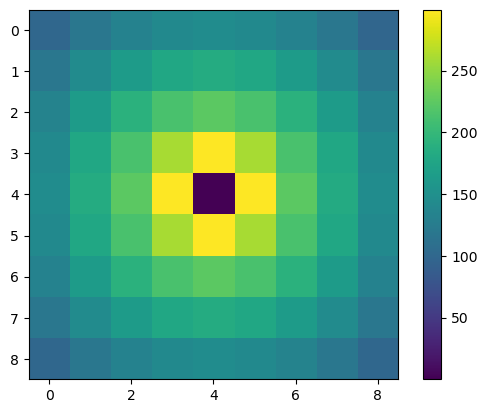

In [5]:
plt.imshow(model.grid_list["cpu"][0].grid.temperature.numpy()[:,:,4])
plt.colorbar()
plt.show()

In [6]:
image = model.make_image(npix=256, pixel_size=0.2*u.arcsec, channels=np.array([1., 1000.])*u.micron, incl=45.*u.degree, pa=45.*u.degree, distance=1.*u.pc, include_gas=False, device='cpu')

100%|██████████| 100000/100000 [00:07<00:00, 13591.78it/s]


Time: 7.9322240352630615


100%|██████████| 100000/100000 [00:00<00:00, 563251.64it/s]


Time: 0.7754969596862793
65536
Module pinballrt.camera 1417a13 load on device 'cpu' took 4.52 ms  (cached)


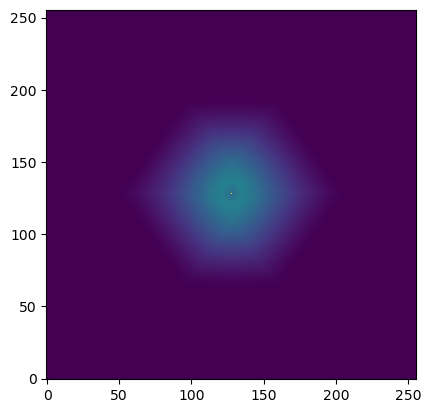

In [7]:
plt.imshow(image.intensity[:,:,1], origin="lower", interpolation="none")
plt.show()

In [8]:
g = Gas()
g.set_properties_from_lambda('co.dat')

image = model.make_image(npix=256, pixel_size=0.2*u.arcsec, channels=np.linspace(-5., 5., 10)*u.km/u.s, rest_frequency=g.nu[2], 
                         incl=45.*u.degree, pa=45.*u.degree, distance=1.*u.pc, include_dust=False, device='cpu')

Including gas 0 transition at 345.7959899 GHz
65536
